# Data Wrangling Project (Udacity)

In [29]:
# Importing all used libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import io
import time
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

The gathering process will exist out of 3 steps. 
1. Manually downloading a .csv file
2. Using the requests library to download a .tsv file.
3. Using the Twitter API to get additional data (e.g. retweet count)

In [30]:
# Downloading and loading in the .csv file
df_dogs = pd.read_csv('twitter-archive-enhanced.csv')
df_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [31]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
df_predictions = pd.read_csv(io.StringIO(response.text), sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit_notify=True)

In [7]:
# use the Tweepy library to get the retweet and favorite count for each tweet
tweet_ids = df_dogs['tweet_id']
amount_of_tweet_ids = len(tweet_ids)
index = 10
start = time.time()
data = {}
data['tweets'] = []
while index < amount_of_tweet_ids:
    try:
        tweet = api.get_status(tweet_ids[index])
        tweet_data = {
            'tweet_id' : tweet.id,
            'favorite_count' : tweet.favorite_count,
            'retweet_count' : tweet.retweet_count
        }
        data['tweets'].append(tweet_data)
        index += 1
        current_time = time.time()
        print(tweet_ids[index], current_time - start)
    except tweepy.TweepError as e:
        print(e)
        print('Could not find tweet.')
        if e.args[0][0]['code'] != 88: # when there is a time-out, don't increment index so no tweet_ids get missed
            index += 1
    except Exception as e:
        print(e)
        print('Could not find tweet.')
        
with open('tweet_json.txt', 'a') as output:
            json.dump(data, output)

889880896479866881 0.32237815856933594
889665388333682689 0.6302697658538818
889638837579907072 0.9042618274688721
889531135344209921 1.2161126136779785
889278841981685760 1.523230791091919
888917238123831296 1.8394153118133545
888804989199671297 2.148406505584717
888554962724278272 2.4364304542541504
888202515573088257 2.805501699447632
[{'code': 144, 'message': 'No status found with that ID.'}]
Could not find tweet.
887705289381826560 3.372300148010254
887517139158093824 3.6576285362243652
887473957103951883 3.9468941688537598
887343217045368832 4.240082740783691
887101392804085760 4.537613391876221
886983233522544640 4.850142240524292
886736880519319552 5.1569414138793945
886680336477933568 5.448435068130493
886366144734445568 6.0112693309783936
886267009285017600 6.329948425292969
886258384151887873 6.644347667694092
886054160059072513 6.958243370056152
885984800019947520 7.283003568649292
885528943205470208 7.568633556365967
885518971528720385 7.869495391845703
885311592912609280 

849336543269576704 70.73779940605164
849051919805034497 71.02519488334656
848690551926992896 71.32240867614746
848324959059550208 71.62306451797485
848213670039564288 71.9320707321167
848212111729840128 72.23185229301453
847978865427394560 72.50117993354797
847971574464610304 72.8281352519989
847962785489326080 73.14319658279419
847842811428974592 73.67961478233337
847617282490613760 73.97947382926941
847606175596138505 74.26854729652405
847251039262605312 74.56415319442749
847157206088847362 74.86197328567505
847116187444137987 75.13759517669678
846874817362120707 75.43398404121399
846514051647705089 75.92616248130798
846505985330044928 76.2381591796875
846153765933735936 76.5508131980896
846139713627017216 76.84869956970215
846042936437604353 77.16480922698975
845812042753855489 77.44191813468933
845677943972139009 77.77488565444946
845459076796616705 78.08134603500366
[{'code': 144, 'message': 'No status found with that ID.'}]
Could not find tweet.
845306882940190720 78.725016355514

819952236453363712 148.6167175769806
819924195358416896 148.89957094192505
819711362133872643 149.47814631462097
819588359383371776 149.7704198360443
819347104292290561 150.17611002922058
819238181065359361 150.47067213058472
819227688460238848 150.83394694328308
819015337530290176 151.1306393146515
819015331746349057 151.43893718719482
819006400881917954 151.74060249328613
819004803107983360 152.0783863067627
818646164899774465 152.37219524383545
818627210458333184 152.67772889137268
818614493328580609 153.25344562530518
818588835076603904 153.55137610435486
818536468981415936 153.8504364490509
818307523543449600 154.12975358963013
818259473185828864 154.42178177833557
818145370475810820 154.74175930023193
817908911860748288 155.04888772964478
817827839487737858 155.3821611404419
817777686764523521 155.6700553894043
817536400337801217 155.98405361175537
817502432452313088 156.35739517211914
817423860136083457 156.64475989341736
817415592588222464 157.00959849357605
817181837579653120 

791784077045166082 226.2019648551941
791780927877898241 226.74978351593018
791774931465953280 227.05452299118042
791672322847637504 227.34387135505676
791406955684368384 227.63504481315613
791312159183634433 227.91499876976013
791026214425268224 228.21997714042664
790987426131050500 228.53004336357117
790946055508652032 228.854971408844
790723298204217344 229.14941334724426
790698755171364864 229.4652030467987
790581949425475584 229.77238154411316
790337589677002753 230.07447338104248
790277117346975746 230.61850118637085
790227638568808452 230.9099531173706
789986466051088384 231.21665358543396
789960241177853952 231.52520966529846
789903600034189313 232.10575437545776
789628658055020548 232.38843989372253
789599242079838210 232.6943759918213
789530877013393408 233.05555987358093
789314372632018944 233.34436917304993
789280767834746880 233.69314432144165
789268448748703744 234.07514262199402
789137962068021249 234.38530230522156
788908386943430656 234.67459869384766
788765914992902144

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

748324050481647620 855.4925630092621
748307329658011649 855.8045120239258
748220828303695873 856.1149044036865
747963614829678593 856.4130449295044
747933425676525569 856.7222497463226
747885874273214464 857.2817449569702
747844099428986880 857.6045544147491
747816857231626240 857.899934053421
747651430853525504 858.1823532581329
747648653817413632 858.4794752597809
747600769478692864 859.0400187969208
747594051852075008 859.3158869743347
747512671126323200 859.646635055542
747461612269887489 859.9367289543152
747439450712596480 860.4747462272644
747242308580548608 860.7785456180573
747219827526344708 861.1842720508575
747204161125646336 861.493923664093
747103485104099331 861.8100333213806
746906459439529985 862.1263611316681
746872823977771008 862.4140946865082
746818907684614144 863.0157787799835
746790600704425984 863.347532749176
746757706116112384 863.6417372226715
746726898085036033 863.9452285766602
746542875601690625 864.2492063045502
746521445350707200 864.5791482925415
74650

714606013974974464 936.4251248836517
714485234495041536 936.7189247608185
714258258790387713 937.0688726902008
714251586676113411 937.3523879051208
714214115368108032 937.6543600559235
714141408463036416 937.9428861141205
713919462244790272 938.228845834732
713909862279876608 938.5524387359619
713900603437621249 938.8662898540497
713761197720473600 939.1981618404388
713411074226274305 939.4889430999756
713177543487135744 939.8014767169952
713175907180089344 940.1009423732758
712809025985978368 940.385155916214
712717840512598017 940.9324045181274
712668654853337088 941.2262904644012
712438159032893441 941.5248694419861
712309440758808576 941.8214571475983
712097430750289920 942.3829779624939
712092745624633345 942.7343280315399
712085617388212225 943.0673868656158
712065007010385924 943.3975124359131
711998809858043904 943.7052655220032
711968124745228288 944.0072064399719
711743778164514816 944.3182089328766
711732680602345472 947.6409130096436
711694788429553666 948.0959119796753
711

696877980375769088 1018.9689400196075
696754882863349760 1019.2562546730042
696744641916489729 1019.8183052539825
696713835009417216 1020.1118352413177
696518437233913856 1020.629310131073
696490539101908992 1020.9326360225677
696488710901260288 1021.2187185287476
696405997980676096 1021.7733805179596
696100768806522880 1022.1872236728668
695816827381944320 1022.4805910587311
695794761660297217 1023.7955365180969
695767669421768709 1024.0924384593964
695629776980148225 1024.3789691925049
695446424020918272 1024.6832015514374
695409464418041856 1024.9918551445007
695314793360662529 1025.298166513443
695095422348574720 1025.5890846252441
695074328191332352 1025.905116558075
695064344191721472 1026.2103741168976
695051054296211456 1026.4946177005768
694925794720792577 1027.0321609973907
694905863685980160 1027.3207564353943
694669722378485760 1027.8854823112488
694356675654983680 1028.1977815628052
694352839993344000 1028.5215334892273
694342028726001664 1029.0770041942596
694329668942569

683111407806746624 1099.8831505775452
683098815881154561 1100.1637427806854
683078886620553216 1100.7400407791138
683030066213818368 1101.0788049697876
682962037429899265 1101.44881606102
682808988178739200 1101.7938914299011
682788441537560576 1102.2271480560303
682750546109968385 1102.5416560173035
682697186228989953 1102.8393745422363
682662431982772225 1103.1335418224335
682638830361513985 1103.676924943924
682429480204398592 1104.049070596695
682406705142087680 1104.367811203003
682393905736888321 1104.6786704063416
682389078323662849 1104.973816394806
682303737705140231 1105.255627632141
682259524040966145 1105.5647246837616
682242692827447297 1106.0666661262512
682088079302213632 1106.3488051891327
682059653698686977 1106.6547048091888
682047327939461121 1106.9630358219147
682032003584274432 1107.2645206451416
682003177596559360 1107.5652849674225
681981167097122816 1107.8899290561676
681891461017812993 1108.1982018947601
681694085539872773 1108.4935145378113
681679526984871937 

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'message': 'Rate limit exceeded', 'code': 88}]
Could not find tweet.
[{'mes

680473011644985345 1693.3943831920624
680440374763077632 1693.6979513168335
680221482581123072 1693.9972405433655
680206703334408192 1694.284551858902
680191257256136705 1694.5853357315063
680176173301628928 1694.9168102741241
680161097740095489 1695.2281756401062
680145970311643136 1695.5280051231384
680130881361686529 1695.8111436367035
680115823365742593 1696.1075582504272
680100725817409536 1696.415067911148
680085611152338944 1696.7137334346771
680070545539371008 1697.0490674972534
680055455951884288 1697.3420884609222
[{'code': 144, 'message': 'No status found with that ID.'}]
Could not find tweet.
679872969355714560 1697.9468948841095
679862121895714818 1698.2522568702698
679854723806179328 1698.5481033325195
679844490799091713 1699.0150504112244
679828447187857408 1699.321268081665
679777920601223168 1699.6037001609802
679736210798047232 1699.919792175293
679729593985699840 1700.2244355678558
679722016581222400 1700.5200300216675
679530280114372609 1700.9340317249298
6795278020

674042553264685056 1763.481151342392
674038233588723717 1763.7878136634827
674036086168010753 1764.1150438785553
674024893172875264 1764.4688596725464
674019345211760640 1764.7892434597015
674014384960745472 1765.1219041347504
674008982932058114 1765.4131262302399
673956914389192708 1765.7229340076447
673919437611909120 1766.0311138629913
673906403526995968 1766.3612177371979
673887867907739649 1766.6479053497314
673716320723169284 1766.994679927826
673715861853720576 1767.2967653274536
673711475735838725 1767.6427295207977
673709992831262724 1767.9575517177582
673708611235921920 1768.258550643921
673707060090052608 1768.5650053024292
673705679337693185 1768.8639800548553
673700254269775872 1769.224488735199
673697980713705472 1769.5603384971619
673689733134946305 1769.8548226356506
673688752737402881 1770.4813630580902
673686845050527744 1770.8517215251923
673680198160809984 1771.1903266906738
673662677122719744 1771.4795198440552
673656262056419329 1772.0193104743958
6736367189653340

669923323644657664 1835.4860343933105
669753178989142016 1835.7903575897217
669749430875258880 1836.0835082530975
669684865554620416 1836.3743658065796
669683899023405056 1836.6745870113373
669682095984410625 1837.003930091858
669680153564442624 1837.4040529727936
669661792646373376 1837.7175719738007
669625907762618368 1838.0097908973694
669603084620980224 1838.3394525051117
669597912108789760 1838.719000339508
669583744538451968 1839.310331583023
669573570759163904 1839.5953204631805
669571471778410496 1839.910475730896
669567591774625800 1840.2206478118896
669564461267722241 1840.5294098854065
669393256313184256 1840.878913640976
669375718304980992 1841.4208283424377
669371483794317312 1841.714833498001
669367896104181761 1842.0126783847809
669363888236994561 1842.3943982124329
669359674819481600 1842.7118875980377
669354382627049472 1843.0230858325958
669353438988365824 1843.359185218811
669351434509529089 1843.7097959518433
669328503091937280 1844.0126886367798
669327207240699904 

The data just collected is stored line by line in a text file in the following format: 
'{"tweet_id": 890006608113172480, "favorite_count": 30019, "retweet_count": 7138}'.

Using regex we will modify this to: '890006608113172480,30019,7138'.
This will enable us to use the read_csv method to load the data into a dataframe.


In [32]:
# Loading the text file back in
with open('tweet_json.txt', 'r') as json_file:  
    data = json.load(json_file)

df_extra_data = pd.DataFrame(data['tweets'])
df_extra_data.head()

,favorite_count,retweet_count,tweet_id
0,30001,7131,890006608113172480
1,27205,4838,889880896479866881
2,47067,9767,889665388333682689
3,26550,4403,889638837579907072
4,14790,2187,889531135344209921


## Assessing Data

### Visual Assessment

In [33]:
df_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


There are NaN values in the in_reply_to_status_id and in_reply_to_user_id columns.  
The doggo, floofer, pupper an dpuppo column contain a lot of None entries.  
It seems that the timestamp column uses the same formatting for each entry.
Some dog names seem to be incorrect, such as 'a' or 'an' or 'the'.

In [34]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [35]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


If we would want to use the species for analysis it could be helpfull to add a column which contains the most probable species.

In [36]:
df_extra_data

,favorite_count,retweet_count,tweet_id
0,30001,7131,890006608113172480
1,27205,4838,889880896479866881
2,47067,9767,889665388333682689
3,26550,4403,889638837579907072
4,14790,2187,889531135344209921
5,24683,5218,889278841981685760
6,28487,4382,888917238123831296
7,25014,4169,888804989199671297
8,19390,3445,888554962724278272
9,21277,3397,888078434458587136


### Programmatic Assessment

In [37]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

As guessed before in the visual assessment, the in_reply_to_status_id and in_reply_to_user_id only contain 78 non_null entries.
Values in the timestamp column are strings, this could be changed to the dateTime datatype.  
retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp are missing values.  
Expaned_urls column is missing some values.

In [38]:
df_dogs['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [39]:
df_dogs['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [40]:
df_dogs['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [41]:
df_dogs['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

It is weird that so few of these columns have correct values. But because we probably won't be using these columns in our analysis they can be dropped in the cleaning process.

In [42]:
df_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Some entries have a rating_numerator or a rating_denominator of 0.

In [43]:
df_dogs[df_dogs.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [44]:
df_dogs[df_dogs.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


If we would want to calculate average scores, dividing by zero could be a problem.

In [45]:
df_dogs['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

When looking at the different values for the rating_denominator, it would probably be fair to change this tweets denominator to 1.

In [46]:
df_extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
favorite_count    2330 non-null int64
retweet_count     2330 non-null int64
tweet_id          2330 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


No null values and all columns have the correct datatype.

In [47]:
df_extra_data.describe()

,favorite_count,retweet_count,tweet_id
count,2330.000000,2330.000000,2.330000e+03
mean,7822.378541,2895.636481,7.415778e+17
std,12166.739108,4903.157279,6.776864e+16
min,0.000000,0.000000,6.660209e+17
25%,1363.500000,583.000000,6.782612e+17
50%,3428.000000,1351.000000,7.182408e+17
75%,9602.750000,3371.750000,7.985830e+17
max,163609.000000,83209.000000,8.900066e+17


### Issues

#### Quality issues (8)
    1. Add an extra column to df_dogs which will contain the correct score (calculate rating_numerator/rating_denominator).
    2. NaN values in the in the in_reply_to_status_id and in_reply_to_user_id columns in the df_dogs dataframe.
    3. Change the datatype from string to dateTime in the timestamp column in the df_dogs dataframe. This can make later analysis easier.
    4. Rows that contain non-null values in the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns in the df_dogs should be deleted.
    5. Expanded_urls column in the df_dogs dataframe is missing some values.
    6. Change the value of the entry in the rating_denominator column in the df_dogs dataframe that has a value of zero.
    7. Incorrect names in the name column in the df_dogs dataframe.
    8. The retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns should be dropped.
    9. Drop all predictions that predicted that the image isn't a dog.
    
#### Tidiness issues (2)
    1. The df_dogs dataframe, the df_extra_data dataframe and the df_predictions dataframe should be merged, as they do not comply to the 'each type of observational unit forms a table' rule.
    2. The 'doggo', 'floofer', 'pupper' and 'puppo' column should be merged into one column.
    

## Cleaning Data

Before starting the cleaning process, we will copy all our dataframes and clean the copies.

In [48]:
df_dogs_clean = df_dogs.copy()
df_extra_clean = df_extra_data.copy()
df_predictions_clean = df_predictions.copy()

#### Define:
The in_reply_to_status_id and in_reply_to_user_id columns need to be removed, as they are not needed for analysis.

In [49]:
# Code:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id']
for column in columns:
    df_dogs_clean.drop([column], axis=1, inplace=True)
df_dogs_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [50]:
# Test
df_dogs_clean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Define:
The datatype of the timestamp column needs to be converted from string to dateTime.

In [51]:
# Code:
df_dogs_clean['timestamp'] = pd.to_datetime(df_dogs_clean['timestamp'])

In [52]:
# Test
df_dogs_clean.timestamp.info()

AttributeError: 'Series' object has no attribute 'info'

#### Define:
Rows that contain non-null entries in the retweeted_status_id, retweeted_status_user_id or retweeted_status_timestamp columns will be deleted.

In [53]:
# Code:
df_dogs_clean = df_dogs_clean[df_dogs_clean.retweeted_status_id.isna()]
df_dogs_clean = df_dogs_clean[df_dogs_clean.retweeted_status_user_id.isna()]
df_dogs_clean = df_dogs_clean[df_dogs_clean.retweeted_status_timestamp.isna()]

In [54]:
# Test:
len(df_dogs_clean[df_dogs_clean.retweeted_status_id.isna()]), len(df_dogs_clean[df_dogs_clean.retweeted_status_user_id.isna()]), df_dogs_clean[df_dogs_clean.retweeted_status_timestamp.isna()]

(2175, 2175,                 tweet_id           timestamp  \
 0     892420643555336193 2017-08-01 16:23:56   
 1     892177421306343426 2017-08-01 00:17:27   
 2     891815181378084864 2017-07-31 00:18:03   
 3     891689557279858688 2017-07-30 15:58:51   
 4     891327558926688256 2017-07-29 16:00:24   
 5     891087950875897856 2017-07-29 00:08:17   
 6     890971913173991426 2017-07-28 16:27:12   
 7     890729181411237888 2017-07-28 00:22:40   
 8     890609185150312448 2017-07-27 16:25:51   
 9     890240255349198849 2017-07-26 15:59:51   
 10    890006608113172480 2017-07-26 00:31:25   
 11    889880896479866881 2017-07-25 16:11:53   
 12    889665388333682689 2017-07-25 01:55:32   
 13    889638837579907072 2017-07-25 00:10:02   
 14    889531135344209921 2017-07-24 17:02:04   
 15    889278841981685760 2017-07-24 00:19:32   
 16    888917238123831296 2017-07-23 00:22:39   
 17    888804989199671297 2017-07-22 16:56:37   
 18    888554962724278272 2017-07-22 00:23:06   
 20    8

#### Define:
The retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns will now be dropped.

In [55]:
# Code:
columns_to_remove = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
for column in columns_to_remove:
    df_dogs_clean.drop([column], axis=1, inplace=True)

In [56]:
# Test:
df_dogs_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Define:
We need to change the value of zero in the rating_denominator column. When looking at the specific tweet it says that '960/00 isn't a valid rating, 13/10 is tho'. So we will change the current rating to 13/10.

In [57]:
# Code:
df_dogs_clean[df_dogs_clean.rating_numerator == 960] # there is only one entry with value 960, so we can easily replace it with 13

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None


In [58]:
df_dogs_clean['rating_denominator'] = df_dogs_clean['rating_denominator'].replace(0, 10)
df_dogs_clean['rating_numerator'] = df_dogs_clean['rating_numerator'].replace(960, 13)

In [59]:
# Test:
df_dogs_clean[df_dogs_clean.rating_numerator == 960]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define:
There are some missing values in the 'expanded_urls' column. This column is not needed in the analysis part, thus it shall be dropped.

In [60]:
# Code:
df_dogs_clean.drop('expanded_urls', axis=1, inplace=True)

In [61]:
# Test:
df_dogs_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


#### Define:
A lot of names in the 'name' column are either missing or wrong. It is possible to use regex to try to extract the names out of the 'text' column. But because this wouldn't give the correct result all the time and because the 'name' column won't be used during the analysis process, this column will also be dropped.

In [62]:
# Code:
df_dogs_clean.drop('name', axis=1, inplace=True)

In [63]:
# Test:
df_dogs_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,None,None,None,None


#### Define:
A score column will be added, this column is the result of dividing rating_numerator by rating_denominator.

In [64]:
# Code:
df_dogs_clean['score'] = df_dogs_clean['rating_numerator']/df_dogs_clean['rating_denominator']

In [65]:
# Test:
df_dogs_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,score
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,None,None,None,None,1.3


In [66]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
score                 2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 203.9+ KB


#### Define:
As non-dog predictions are not interesting for analysis, all rows containing non-dog predictions in p1 will be dropped.

In [67]:
# Code:
df_predictions_clean = df_predictions_clean[df_predictions_clean.p1_dog]

In [68]:
# Test:
df_predictions_clean.p1.value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
cocker_spaniel                  30
malamute                        30
French_bulldog                  26
miniature_pinscher              23
Chesapeake_Bay_retriever        23
Staffordshire_bullterrier       20
Siberian_husky                  20
German_shepherd                 20
Cardigan                        19
Eskimo_dog                      18
beagle                          18
Maltese_dog                     18
Shetland_sheepdog               18
Rottweiler                      17
Shih-Tzu                        17
Lakeland_terrier                17
Italian_greyhound               16
kuvasz                          16
West_Highland_white_terrier     14
Great_Pyrenees      

#### Define:
The 'doggo', 'floofer', 'pupper', 'puppo' columns should be merged into one column. This will be done by combining the columuns into one and use regex to clean up this column.

In [69]:
# Code:
df_dogs_clean['dogs_stage'] = df_dogs_clean['puppo'] + ',' + df_dogs_clean['pupper'] + ',' + df_dogs_clean['floofer'] + ',' + df_dogs_clean['doggo']
df_dogs_clean['dogs_stage'] = df_dogs_clean['dogs_stage'].str.replace('None', '').str.strip(',').str.replace('(,,,)|(,,)', ',')
df_dogs_clean['dogs_stage'].value_counts()

                 1831
pupper            224
doggo              75
puppo              24
pupper,doggo       10
floofer             9
puppo,doggo         1
floofer,doggo       1
Name: dogs_stage, dtype: int64

In [70]:
# we still have to remove the old columns
columns_to_remove = ['doggo', 'floofer', 'pupper', 'puppo']
for column in columns_to_remove:
    df_dogs_clean.drop([column], axis=1, inplace=True)

In [71]:
# Test:
df_dogs_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,score,dogs_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,1.3,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,1.3,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,1.2,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,1.3,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,1.2,


In [72]:
df_dogs_clean.dogs_stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
pupper,doggo       10
floofer             9
puppo,doggo         1
floofer,doggo       1
Name: dogs_stage, dtype: int64

#### Define:
The three dataframes will be merged.

In [73]:
# Code:
df_clean = pd.merge(df_dogs_clean, df_extra_clean, on='tweet_id', how='inner')

In [74]:
# Test
df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,score,dogs_stage,favorite_count,retweet_count
0,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,10,1.3,,30001,7131
1,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,13,10,1.3,,27205,4838
2,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,1.3,puppo,47067,9767
3,889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,12,10,1.2,,26550,4403
4,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,13,10,1.3,puppo,14790,2187


In [75]:
# Code:
df_clean = pd.merge(df_clean, df_predictions_clean, on='tweet_id', how='inner')

In [76]:
# Test:
df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,score,dogs_stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,10,1.3,,30001,7131,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
1,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,13,10,1.3,,27205,4838,...,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,1.3,puppo,47067,9767,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
3,889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,12,10,1.2,,26550,4403,...,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
4,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,13,10,1.3,puppo,14790,2187,...,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True


To finish the cleaning process we will now store the clean dataframe in a .csv file.

In [77]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Data Analysis

Now that all our data is cleaned, we can start our analysis. Some interesting questions could be:
    1. Which species scores the highest points on average?
    2. Does the favorite_count correlate with the score?
    3. Does the retweet_count correlate with the score?

In [78]:
df = pd.read_csv('twitter_archive_master.csv')

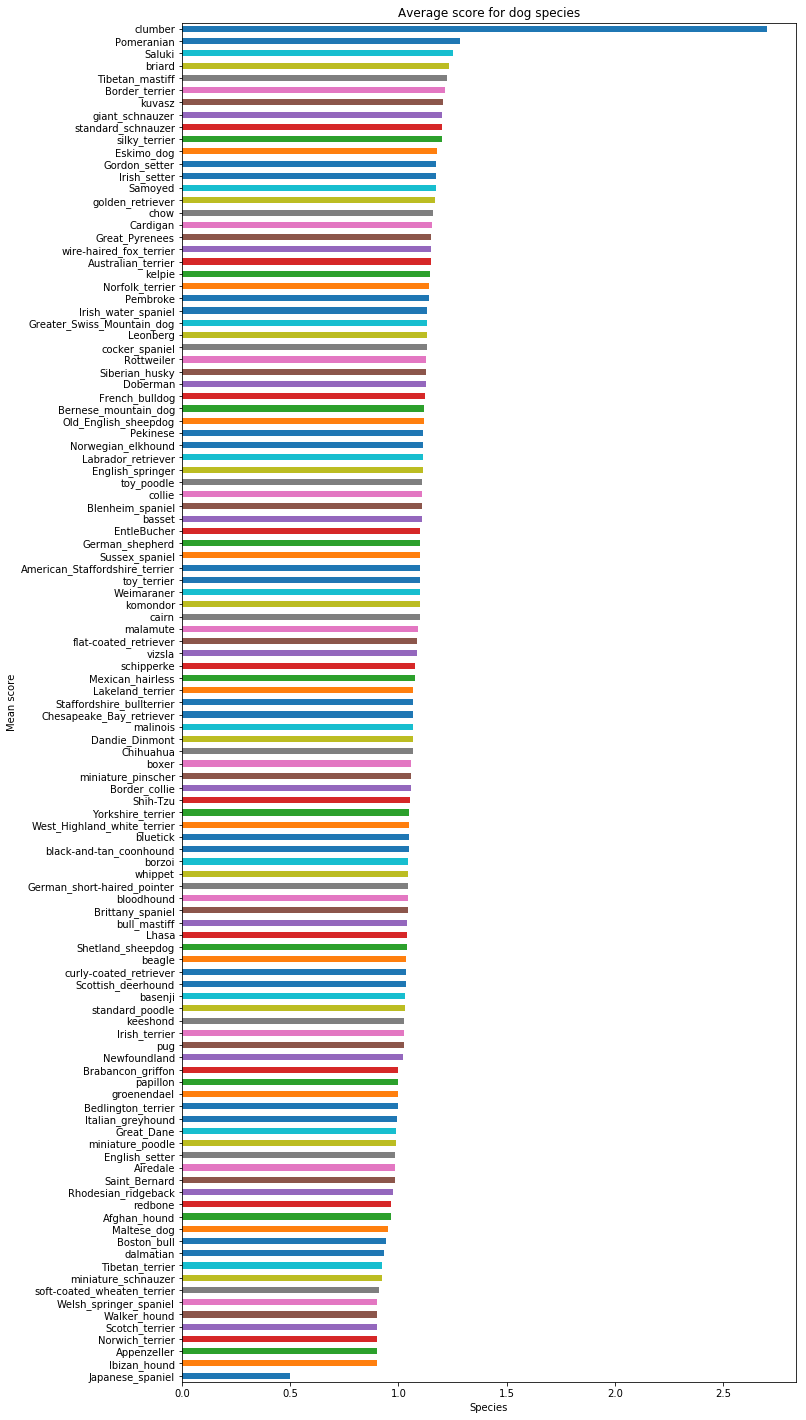

In [79]:
# Which species scores the highest points on average?

# We will assume p1 will be the correct species
df_bar = df.groupby('p1').mean()['score'].sort_values(ascending=True)
bar = df_bar.plot(y='Mean score', title='Average score for dog species', figsize=(11,25), kind='barh');
bar.set_xlabel("Species")
bar.set_ylabel('Mean score');

In [80]:
len(df[df.p1 == 'clumber']), len(df[df.p1 == 'Japanese_spaniel'])

(1, 1)

We can see that outside of the clumber and Japanese_spaniel species, the species doesn't have a large impact in average score. For both the clumber and Japanese_spaniel there is only one occurance in the entire dataset, so these are not represantable for the entire species. 

In [81]:
# Does the favorite_count correlate with the score? 
# Does the retweet_count correlate with the score?

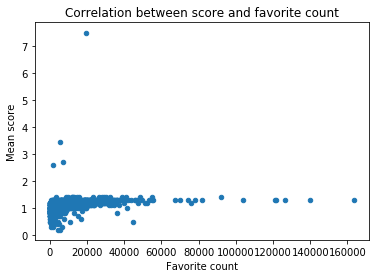

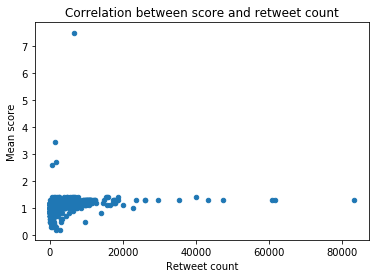

In [82]:
scatter1 = df.plot.scatter(x='favorite_count', y='score');
scatter1.set_title('Correlation between score and favorite count')
scatter1.set_xlabel('Favorite count')
scatter1.set_ylabel('Mean score')

scatter2 = df.plot.scatter(x='retweet_count', y='score');
scatter2.set_title('Correlation between score and retweet count')
scatter2.set_xlabel('Retweet count')
scatter2.set_ylabel('Mean score');

When looking at both the scatter plots it seems that there is no real correlation between favorite_count and score, or retweet_count and score. We will now calculate the correlation coefficient to confirm our suspicion.

In [83]:
np.corrcoef(df.favorite_count, df.score)[0, 1], np.corrcoef(df.retweet_count, df.score)[0, 1]

(0.2857583953330605, 0.21960017107230764)

These coefficients are both small, meaning there is no clear correlation and confirming our earlier suspicion.

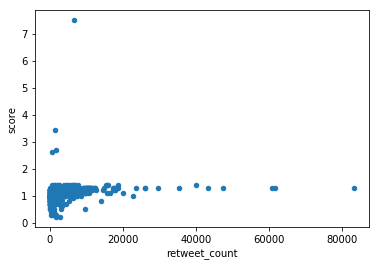

In [84]:
df.plot.scatter(x='retweet_count', y='score')

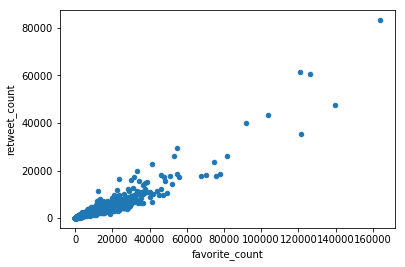

In [85]:
df.plot.scatter(x='favorite_count', y='retweet_count')